In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ps2_data-1.csv')
df.head(5)

,label,x1,x2
0,0,0.655965,-1.063205
1,1,-7.084630,2.034800
2,1,-2.420879,-2.639450
3,1,-4.278147,-0.410740
4,0,-1.081851,3.804022


In [3]:
def config_df():
    """
        config_df() is a function to specifically load 
        and reconfigure the dataset.
        
        The function takes no argument, but will load the
        data file and reconfigure it each time it is run.
        
        The output should be a pandas dataframe assigned to
        the variable 'df'
    """
    # load original dataset
    df = pd.read_csv('ps2_data-1.csv')
    df = df.rename(columns={'label': 'Insolvent', 'x1': 'ROE', 'x2': 'Current_Ratio'})
    df = df[['ROE', 'Current_Ratio', 'Insolvent']]
    return df

In [5]:
def array_maker(df):
    """
       The function array_maker takes an n-column dataframe 
       df, with m rows, and returns:
        
         X, a (m x n-1) feature matrix
         y, a column vector
       
       You should assume that the dataframe is arranged where the last
       column is the target variable, y.
    """
    # YOUR CODE HERE
    X = df.iloc[:,0:-1].values
    y = df.iloc[:,-1].values
    return X, y

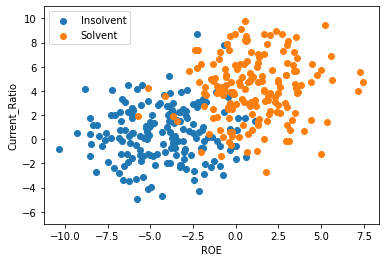

In [7]:
mask = y.flatten() == 1
insolv = plt.scatter(X[mask][:,0], X[mask][:,1])
solv = plt.scatter(X[~mask][:,0], X[~mask][:,1])
plt.ylim(-7, 11) 
plt.xlabel('ROE')
plt.ylabel('Current_Ratio')
plt.legend((insolv, solv), ('Insolvent', 'Solvent'))
plt.show()

In [8]:
def sigmoid(z):
    """implementation of the sigmoid function,
    which takes input z, a positive or negative 
    real number, and returns a value between 
    0 and 1.
    
    """
    gz = 1/(1 + np.exp(-z))
    return gz

In [9]:
# Public Test 
assert sigmoid(0) == 0.5
assert round(sigmoid(.5),5) == 0.62246

In [10]:
def computeJ(theta, X, y):
    """
        computeCostFunction() computes the cost function
        J for logistic regression.
        
    """
    # number of training samples
    m = len(y)  
    h = sigmoid(np.dot(X, theta))
    J = -1/m * np.sum( np.multiply(np.log(h), y) + np.multiply(np.log(1-h), (1-y)))
    return J

In [12]:
def computeGradient(theta, X, y):
    """
        computeGradient() computes the gradient
        grad for logistic regression"""
    # number of training samples
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1/m)*np.dot(X.T, (h - y))
    return grad

In [13]:
def costFunction(theta, X, y):
    """Executable cost function"""
    # use cost function
    J = computeJ(theta, X, y)
    
    # use gradient function
    grad = computeGradient(theta, X, y)
    
    return J, grad 

In [14]:
def computeGradient(theta, X, y):
    """
        computeGradient() computes the gradient
        grad for logistic regression"""
    # number of training samples
    m = len(y)
    
    # YOUR CODE HERE
    h = sigmoid(np.dot(X, theta))
    grad = (1/m)*np.dot(X.T, (h - y))
    return grad

In [15]:
def costFunction(theta, X, y):
    """Executable cost function"""
    # use cost function
    J = computeJ(theta, X, y)
    
    # use gradient function
    grad = computeGradient(theta, X, y)
    
    return J, grad 

In [16]:
# setup the data matrix appropriately
m, n = X.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

# initalize theta
initial_theta = np.zeros(n+1)

# compute and display initial cost and gradient
J, grad = costFunction(initial_theta, X, y)

# print cost J at initialization
print('Cost at initial theta (zeros): {0}'.format(J))
# print gradiate at initialization
print('Gradient at inital theta (zeros): {0}'.format(grad))

Cost at initial theta (zeros): 0.6931471805599454
Gradient at inital theta (zeros): [0.00141643 1.31783649 0.93191404]


In [18]:
# Compute optimal parameter vector 
# theta_opt using BFGS

from scipy.optimize import fmin_bfgs
theta_opt = fmin_bfgs(computeJ, initial_theta, fprime=computeGradient,
                maxiter=100, args=(X,y), disp=True)

Optimization terminated successfully.
         Current function value: 0.210453
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15


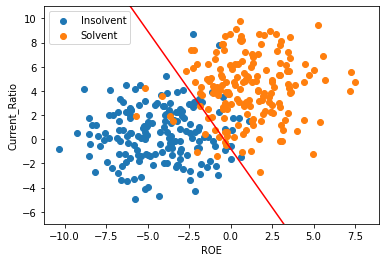

In [19]:
# Plot Decision Boundary
mask = y.flatten() == 1
insolv = plt.scatter(X[mask][:,1], X[mask][:,2])
solv = plt.scatter(X[~mask][:,1], X[~mask][:,2])
plt.ylim(-7, 11) 
plt.xlabel('ROE')
plt.ylabel('Current_Ratio')
plt.legend((insolv, solv), ('Insolvent', 'Solvent'))
plot_x = [-10, 8]
plot_y = -1/theta_opt[2]*(theta_opt[0] 
          + np.dot(theta_opt[1],plot_x))
plt.plot(plot_x, plot_y, '-', c="red")
plt.show()

In [20]:
def probabilityInsolvent(score1, score2, theta):
    """
        probabilityInsolvent calculates the probability that a
        firm is insolvent based on two indicators:
        
          score1, which in our model is the ROE score;
          score2, which in our model is the Current Ratio;
        
        according to the logistic regression model parameterized by 
        
          theta, the fitted parameter vector
          
        and the features matrix X and labeled category vector y.
 
    """
    #construct a 1 x 2 array from score1 and score2
    scores = np.array([score1, score2])
    
    # add a 1 to the front of scores, yielding 
    # a 1 x 3 array
    scores = np.hstack((np.array([1]), scores))
    
    prob = sigmoid(np.dot(scores,theta))
    return prob

In [21]:
# Compute the probability of insolvency
probabilityInsolvent(0.0, 0.0, theta_opt)

0.3971584898269463